<a href="https://colab.research.google.com/github/maxGrigorenko/DistributionClassifier/blob/maxGrigorenko%2Ffirst_part/src/experiments_first_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация распределений. Первая часть проекта
## 2. Исследовение числовых характеристик графов при фиксированных параметрах распределений


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product


from graph_common_functions import *
from distibution_functions import *

In [69]:
sigma = 1
beta = (1/2) ** 0.5

In [70]:
def plot_n(begin_n, end_n, step_n=1, number_of_experiments=5, k=3, d=0.1):

    normal_dominating_number_arr = []
    normal_delta_arr = []
    laplace_dominating_number_arr = []
    laplace_delta_arr = []
    n_arr = range(begin_n, end_n, step_n)
    for n in tqdm(n_arr):
        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                             distribution='normal', sigma=sigma, beta=beta, k=k, d=d)
        delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="knn",
                                             distribution='normal', sigma=sigma, beta=beta, k=k, d=d)

        normal_dominating_number_arr.append(dominating_number)
        normal_delta_arr.append(delta)

        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                             distribution='laplace', sigma=sigma, beta=beta, k=k, d=d)
        delta = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="knn",
                                             distribution='laplace', sigma=sigma, beta=beta, k=k, d=d)

        laplace_dominating_number_arr.append(dominating_number)
        laplace_delta_arr.append(delta)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle(f"Compare normal and laplace distributions", fontsize=14, y=1.05)
    ax1.plot(n_arr, normal_dominating_number_arr, color='skyblue', label="normal")
    ax1.plot(n_arr, laplace_dominating_number_arr, color='orange', label="laplace")
    ax1.legend()
    ax1.set_title(f'distance graph dominating number from different sample sizes')
    ax1.set_xlabel('sample size')
    ax1.set_ylabel('dominating number')

    ax2.plot(n_arr, normal_delta_arr, color='skyblue', label="normal")
    ax2.plot(n_arr, laplace_delta_arr, color='orange', label="laplace")
    ax2.set_title(f'knn graph delta from different sample sizes')
    ax2.set_xlabel('sample size')
    ax2.set_ylabel('delta')
    ax2.legend()

    plt.tight_layout()
    plt.show()


100%|██████████| 99/99 [03:48<00:00,  2.31s/it]


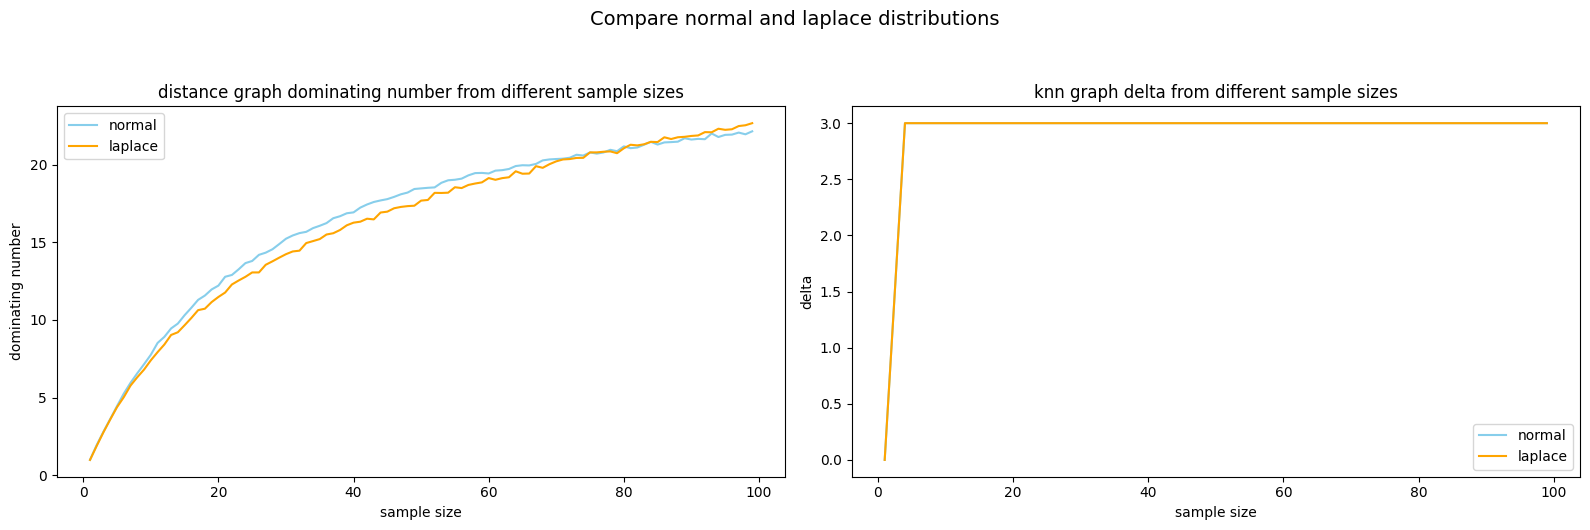

In [ ]:
plot_n(begin_n=1, end_n=100, step_n=1, number_of_experiments=500, k=3, d=0.1)

График delta в knn не информативен. Графики числа доминирования в дистанционных графах очень похожи, через такую характеристику будет крайне затруднительно делать предположение на распределение. Попробуем добиться более явных различий при других значениях d.

In [ ]:
def plot_n_dominating(begin_n, end_n, step_n=1, number_of_experiments=5, d=0.1):

    normal_dominating_number_arr = []
    normal_delta_arr = []
    laplace_dominating_number_arr = []
    laplace_delta_arr = []
    n_arr = range(begin_n, end_n, step_n)
    for n in tqdm(n_arr):
        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                             distribution='normal', sigma=sigma, beta=beta, d=d)

        normal_dominating_number_arr.append(dominating_number)

        dominating_number = avg_chars(number_of_experiments=number_of_experiments, n=n, graph_type="distance",
                                             distribution='laplace', sigma=sigma, beta=beta, d=d)

        laplace_dominating_number_arr.append(dominating_number)

    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Compare normal and laplace distributions", fontsize=14, y=1.05)
    plt.plot(n_arr, normal_dominating_number_arr, color='skyblue', label="normal")
    plt.plot(n_arr, laplace_dominating_number_arr, color='orange', label="laplace")
    plt.legend()
    plt.title(f'distance graph dominating number from different sample sizes')
    plt.xlabel('sample size')
    plt.ylabel('dominating number')
    plt.tight_layout()
    plt.show()


100%|██████████| 99/99 [00:09<00:00, 10.91it/s]


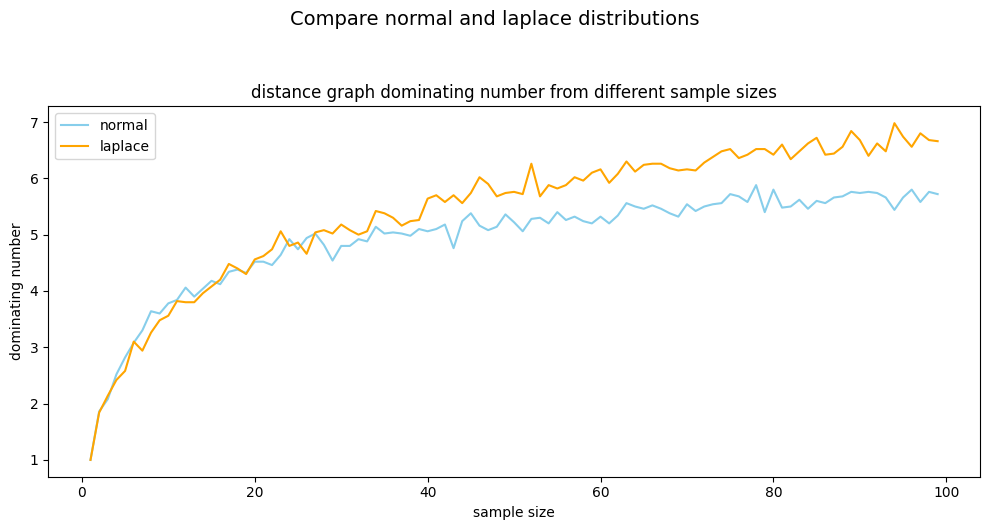

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=0.5, number_of_experiments=50)

Стало чуть лучше, но все равно при маленьких значениях n графики почти не отличимы.

100%|██████████| 99/99 [00:09<00:00, 10.09it/s]


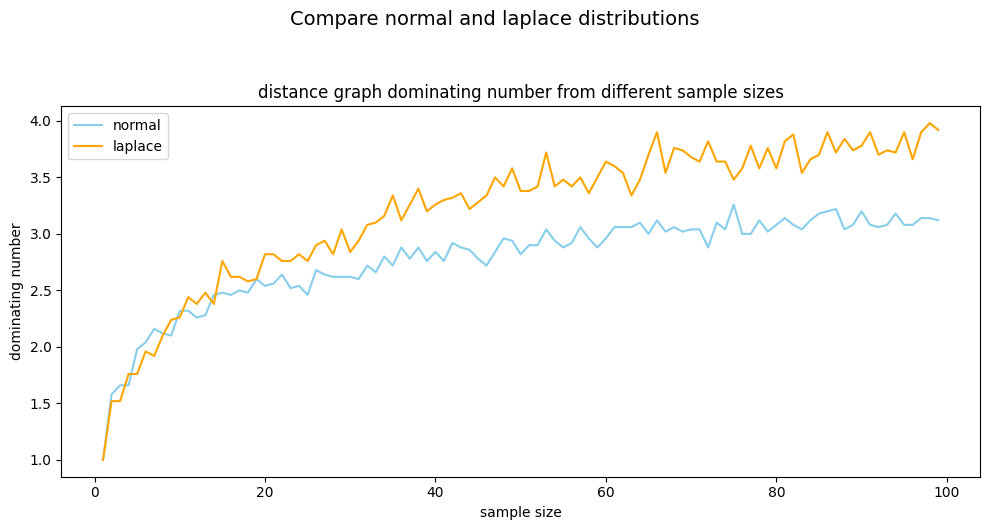

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=1.0, number_of_experiments=50)

100%|██████████| 99/99 [00:10<00:00,  9.62it/s]


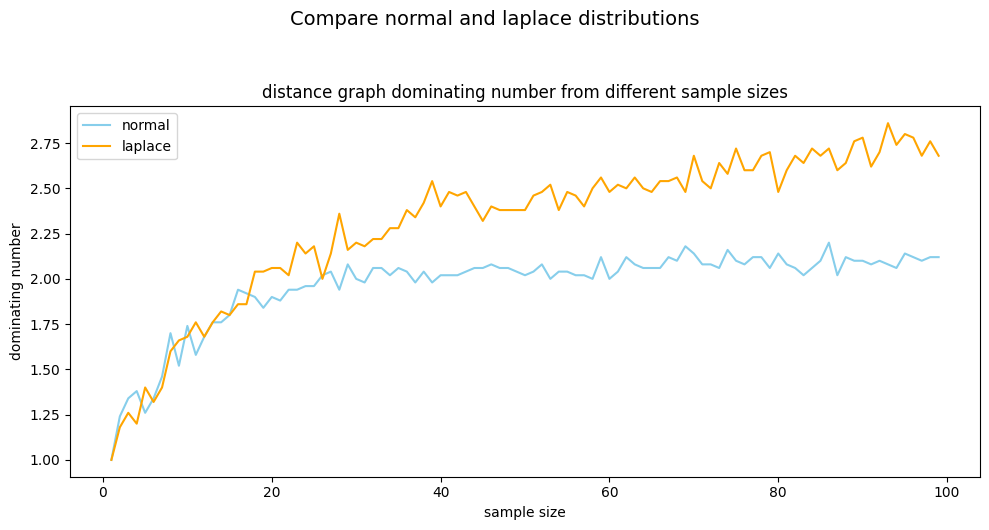

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=1.5, number_of_experiments=50)

100%|██████████| 99/99 [00:10<00:00,  9.29it/s]


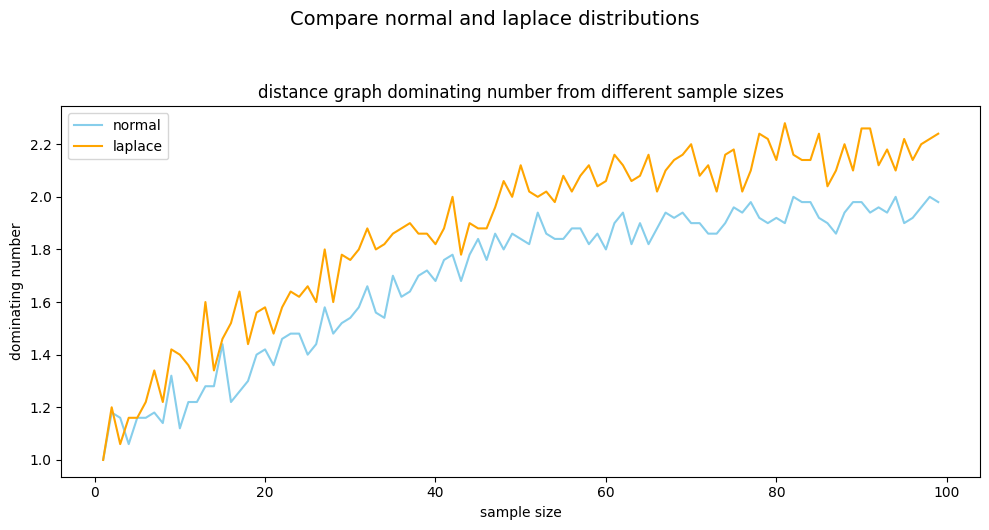

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=2.0, number_of_experiments=50)

100%|██████████| 99/99 [00:10<00:00,  9.29it/s]


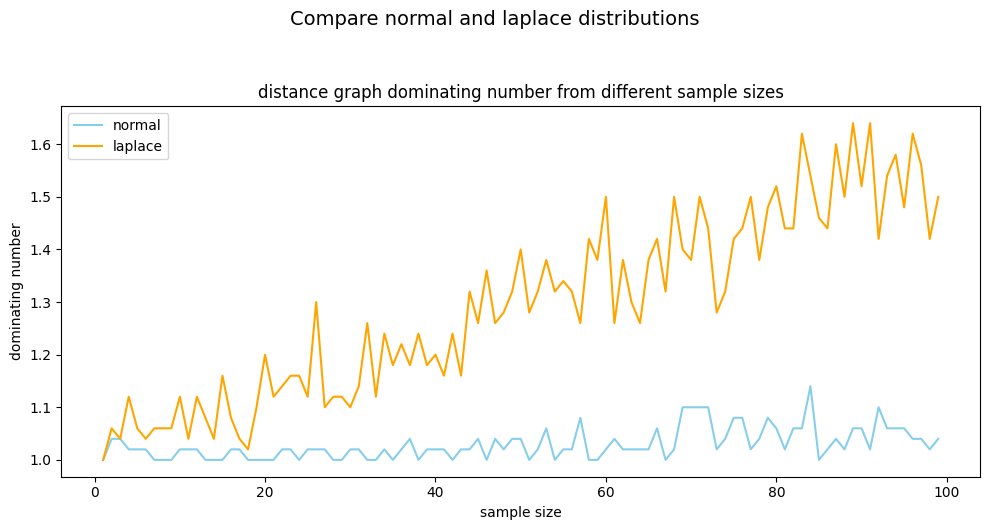

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=3.0, number_of_experiments=50)

100%|██████████| 99/99 [00:09<00:00,  9.94it/s]


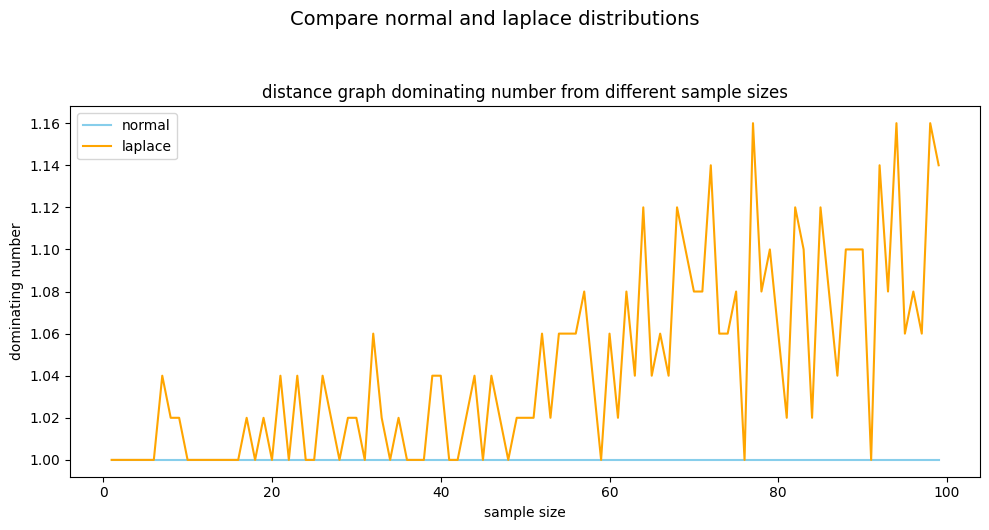

In [ ]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=4.0, number_of_experiments=50)

Видим интересную тенденцию - при больших значених d (d > 3) доминирующее число в графе от точек нормального распределения почти всегда равно 1, а при распределении Лапласа чуть больше

100%|██████████| 199/199 [01:20<00:00,  2.48it/s]


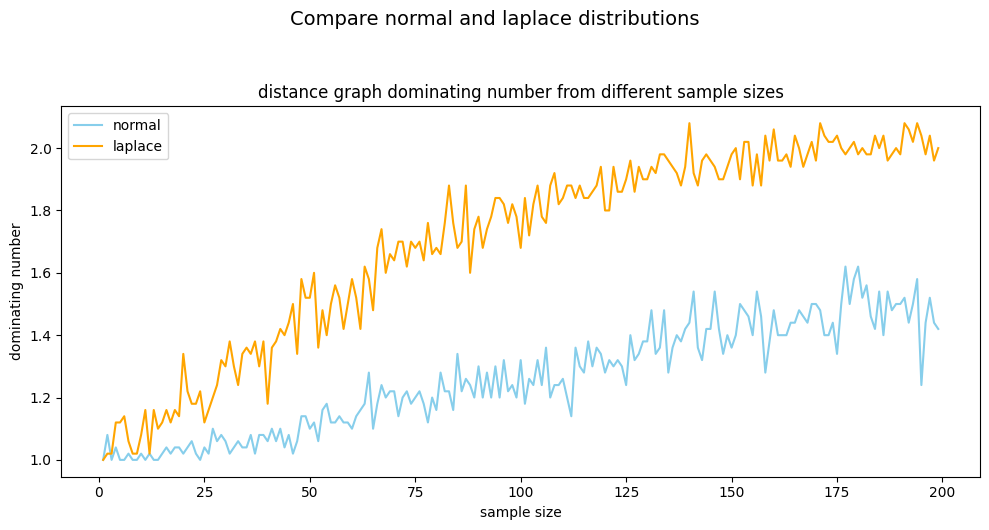

In [ ]:
plot_n_dominating(begin_n=1, end_n=200, step_n=1, d=2.7, number_of_experiments=50)

100%|██████████| 99/99 [00:10<00:00,  9.30it/s]


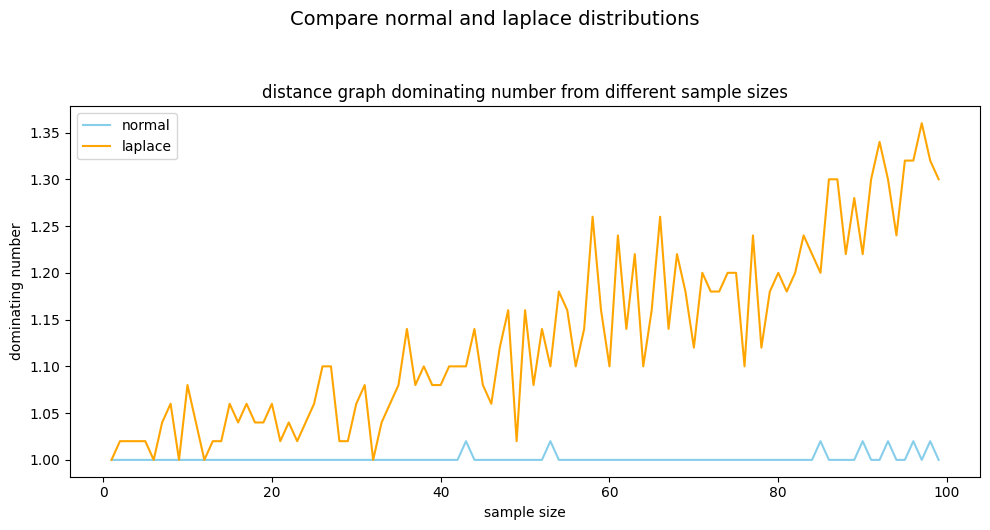

In [104]:
plot_n_dominating(begin_n=1, end_n=100, step_n=1, d=3.5, number_of_experiments=50)